In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [3]:
def trl_dvsn(n):
    
    isprime = True
    cnt = 2
    
    while isprime and cnt < n:
        if n%cnt == 0:
            isprime = False
        else:
            cnt += 1
    
    return isprime

**Problem 1** (3pts for each part): As we covered in class, for a given natural number $n\in \mathbb{N}$, we say it is prime if its only divisors are $1$ and itself.  Otherwise, we say the number is composite.  Likewise, we have the _Fundamental Theorem of Arithmetic_, which says that for any $n\in\mathbb{N}$, $n$ has a prime factorization so that 
$$
n = p_{1}^{k_{1}}\cdots p_{j}^{k_{j}}, ~ k_{j}\in \mathbb{N}
$$
where each $p_{l}$ is prime and the decomposition is unique modulo rearranging the order of the terms.  Show

* If $n$ is composite, show there is a prime factor $p_{j}$ such that $p_{j}\leq\sqrt{n}$.
* If $n>6$ and $n$ is prime, show that there is some $k\in\mathbb{N}$ such that $n=6k+1$ or $n=6k+5$.

_Answer for Problem 1_: For the first part, for given composite $n\in \mathbb{N}$ let 

$$
\tilde{p} = \min_{l} p_{l}, 
$$

where $p_{l}$ is a prime factor of $n$, so that $\tilde{p}$ is the smallest prime factor of $n$.  Given that the $k_{j}\geq 1$, we then see that 

$$
n \geq \tilde{p}^{2},
$$

and thus if $n$ is composite it must have at least one prime factor such that $p\leq \sqrt{n}$.  As for the second part, we note that among the values

$$
6k, 6k+1, 6k+2, 6k+3, 6k+4, 6k+5,
$$

only $6k+1$ and $6k+5$ cannot be factored.  Thus if a number is prime and larger than 6, it must be either of the form $6k+1$ or $6k+5$.

**Problem 2** (10pts): Using the code provided below and the results from Problem 1, 

* Implement a better test of whether a number is prime than the simple trial division algorithm provided above at the beginning of the notebook. Briefly explain the `if n>=49 and n<121` and `elif n>=121` checks as well.  (4pts)  

* Develop several test cases using both the simple algorithm and your new one to make sure your new algorithm is correct.  (3pts)

* For $2\leq n \leq 10^{5}$, compare the difference in times between your new algorithm and the simple one.  Make a semilog plot of the time differences.  Describe any trends you see from your plot.  (3pts)

In [4]:
def bttr_trl_dvsn(n):
    
    isprime = True
    nsq = np.sqrt(n)
    
    if n%2 == 0 or n%3 == 0 or n%5 == 0:
        if n!=2 and n!=3 and n!=5:
            isprime = False
    else:
        
        kmax = 0
        if n>=49 and n<121:
            kmax = int(np.floor((nsq-1.)/6.))
        elif n>=121:
            kmax = int(np.floor((nsq-5.)/6.))
        
        if kmax > 0:
            for kk in range(0,kmax):
                tstnmbr = 6*(kk+1)+1
                if n%tstnmbr == 0:
                    isprime = False 
                    break
                else:
                    tstnmbr += 4
                    if tstnmbr <= nsq:
                        if n%tstnmbr == 0:
                            isprime = False
                            break
    
    return isprime

We look at a handful of test cases in order to make sure our code is doing the right thing.

In [16]:
# Obvious primes
print(trl_dvsn(7))
print(bttr_trl_dvsn(7))
print()

print(trl_dvsn(11))
print(bttr_trl_dvsn(11))
print()

print(trl_dvsn(13))
print(bttr_trl_dvsn(13))
print()

# Another prime
print(trl_dvsn(307))
print(bttr_trl_dvsn(307))
print()

# 11^3
print(trl_dvsn(1331))
print(bttr_trl_dvsn(1331))
print()

# 39^2
print(trl_dvsn(1521))
print(bttr_trl_dvsn(1521))
print()

# 73^4
print(trl_dvsn(28398241))
print(bttr_trl_dvsn(28398241))

True
True

True
True

True
True

True
True

False
False

False
False

False
False


As we can see, by looking at a range of different values, we get the same results for both codes, so we have some confindence that we have done things correctly.   

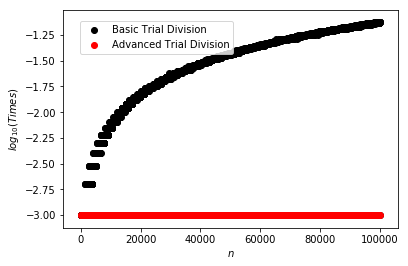

In [9]:
# Timing code skeleton
nmax = int(1e5) # This will take a second to run. 
nvals = np.arange(2,nmax+1)
nlen = nvals.size
timesstd = np.zeros(nlen)
timesbtr = np.zeros(nlen)

for jj in range(nlen):
    start = time()
    flag = trl_dvsn(nvals[jj])
    end = time()
    timesstd[jj] = end-start
    
    start = time()
    flag = bttr_trl_dvsn(nvals[jj])
    end = time()
    timesbtr[jj] = end-start
    
plt.scatter(nvals,np.ma.log10(timesstd),color='k',label="Basic Trial Division")
plt.scatter(nvals,np.ma.log10(timesbtr),color='r',label="Advanced Trial Division")
plt.xlabel('$n$')
plt.ylabel('$log_{10}(Times)$')
plt.legend(loc=(.05,.8))

As we see from the plot, the more advanced version of trial division we developed is markedly faster than the relatively obvious version we first developed.  The more advanced version remains relatively flat in terms of the time taken to run even up to $n=10^{5}$, while the basic trial division algorithm becomes almost a 100 times slower by the time $n=10^{5}$.  Clearly we would not want to continue with the basic version.  